In [1]:
# Python is slow for repeated low level execution tasks

def func_python(N):
    d = 0.0
    for i in range(N):
        d += (i % 3 - i) * i
    return d

%timeit func_python(1000000)


1 loop, best of 3: 249 ms per loop


In [2]:
# Using NUMPY, ufunc
a = list(range(100000)) #[1,3,2,4,3,1,4,2]
b = []
%timeit b = [val + 5 for val in a]
print(b)


100 loops, best of 3: 8.44 ms per loop
[]


In [3]:
import numpy as np
a = np.array(a)
%timeit b = a + 5
print(b)

10000 loops, best of 3: 84.8 µs per loop
[]


In [7]:
# Using NUMPY aggregations (min, max, mean, sum...)
from random import random
c = [random() for i in range(100000)]
%timeit min(c)


1000 loops, best of 3: 1.51 ms per loop


In [8]:
c = np.array(c)
%timeit c.min()


The slowest run took 161.82 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 23.3 µs per loop


In [9]:
def func_pythonNP(N):
    d = 0.0
    n = np.arange(N)
    #for i in range(N):
    #    d += (i % 3 - i) * i
    a = ((n % 3 - n) * n).sum()
    
    return a

%timeit func_pythonNP(1000000)

100 loops, best of 3: 9.11 ms per loop


In [10]:
# Broadcasting
# rules by which ufuncs operates on arrays of different dimensions...



In [11]:
# slicing, masking and fancy indexing.
L = np.array([1,4,7,9,10])
mask = (L < 4) | (L > 8)
print(mask)
print(L[mask])

[ True False False  True  True]
[ 1  9 10]


In [12]:
# fancy indexin
ind = [0,4,2]
L[ind]


array([ 1, 10,  7])

In [162]:
# Broadcasting tests
a = np.random.random((10,3))
print(a)
print('argmin : {}'.format(np.argmin(a)))
print('argmin along row  : {}'.format(np.argmin(a,0)))
print('argmin along col  : {}'.format(np.argmin(a,1)))

a = np.arange(24)
a = a.reshape([2,3,4])
b = np.arange(100,108)
b = b.reshape([2,1,4])
print('a : {}'.format(a))
print('b : {}'.format(b))
c = a + b
print('a +  b : {}'.format(a+b))
print('b +  a : {}'.format(b+a))

print('Diff ----- ')
a = np.arange(1,21)
a = a.reshape([10,2])
aC = a.reshape(([10,1,2]))
print('a : {}'.format(a))
print('aC : {}'.format(aC))

print('aC -  a : {}'.format(aC-a))
print('a -  aC : {}'.format(a-aC))



[[ 0.486  0.632  0.277]
 [ 0.389  0.63   0.205]
 [ 0.589  0.97   0.056]
 [ 0.377  0.886  0.615]
 [ 0.967  0.073  0.983]
 [ 0.653  0.052  0.479]
 [ 0.038  0.503  0.637]
 [ 0.789  0.904  0.731]
 [ 0.849  0.021  0.3  ]
 [ 0.906  0.522  0.514]]
argmin : 25
argmin along row  : [6 8 2]
argmin along col  : [2 2 2 0 1 1 0 2 1 2]
a : [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
b : [[[100 101 102 103]]

 [[104 105 106 107]]]
a +  b : [[[100 102 104 106]
  [104 106 108 110]
  [108 110 112 114]]

 [[116 118 120 122]
  [120 122 124 126]
  [124 126 128 130]]]
b +  a : [[[100 102 104 106]
  [104 106 108 110]
  [108 110 112 114]]

 [[116 118 120 122]
  [120 122 124 126]
  [124 126 128 130]]]
Diff ----- 
a : [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]
aC : [[[ 1  2]]

 [[ 3  4]]

 [[ 5  6]]

 [[ 7  8]]

 [[ 9 10]]

 [[11 12]]

 [[13 14]]

 [[15 16]]

 [[17 18]]

 [[19 20]]]
aC -  a : [[[  0   0]
  [ -

4 closest : [[ 0.495  0.627]
 [ 0.496  0.627]
 [ 0.224  0.303]
 [ 0.225  0.302]]


(-0.050521171076271569,
 1.0519811103463719,
 -0.053219801606939843,
 1.0533150544405783)

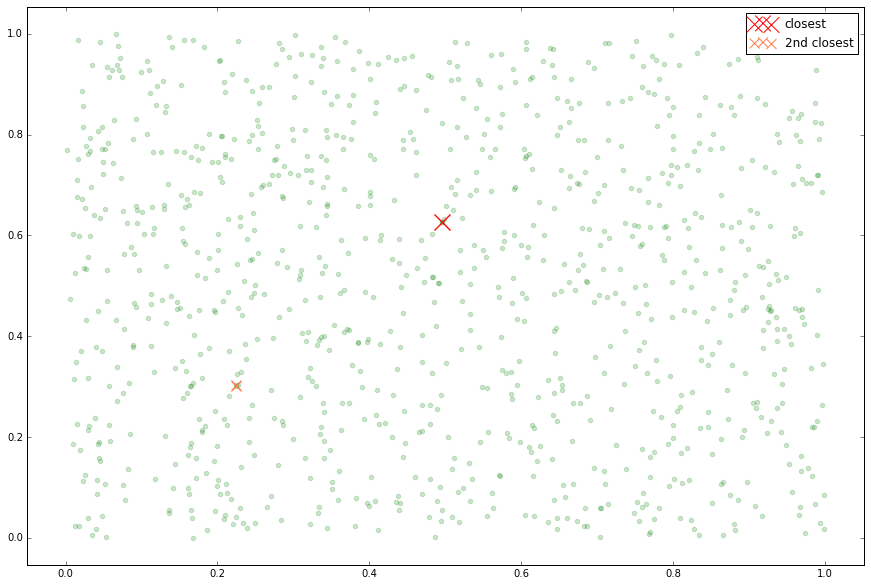

In [166]:
# Full example : nearest neighbour
NB_POINTS = 1000
NB_DIM = 2

np.set_printoptions( precision=3 )

X = np.random.random((NB_POINTS, NB_DIM))

#X = np.array([[ 0.06008564,  0.10100444],
# [ 0.52398998,  0.48702044],
# [ 0.35600764,  0.03634918],
# [ 0.28153461,  0.8830437 ],
# [ 0.0673205,   0.02907223],
# [ 0.93253217,  0.37681945],
# [ 0.3096921 ,  0.27999451],
# [ 0.89215408,  0.60261101],
# [ 0.82183965,  0.79738949],
# [ 0.86286699,  0.01018274]])

#print('X.shape : {}'.format(X.shape))
XR = X.reshape(NB_POINTS,1,NB_DIM)
#print('X : {}'.format(X))
#print('XR : {}'.format(XR))
diff = X - XR

#print('Diff.shape : {}'.format(diff.shape))
#print(diff)

D = (diff **2).sum(2)
D.shape

i = np.arange(NB_POINTS)
D[i,i] = np.inf
#print('Distance:\n {}'.format(D))

i = np.argmin(D, 1)

Dmin = np.sort(D,1)[:,0]
#print('Dmin : {}'.format(Dmin))
iminIndex = np.argsort(Dmin)
#print('imin array : {}'.format(iminIndex))
print('4 closest : {}'.format(X[iminIndex[:4],:]))

#print('i[:n] : {}'.format(i[:10]))
#print('X[i..] : {}'.format(X[i[:3]]))

import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline 
pl.figure(figsize=(15,10))

pl.scatter(X[:,0], X[:,1], color='g', alpha='0.2')

#display the 2 closest points
pl.scatter(X[iminIndex[:2],0],X[iminIndex[:2],1],marker='x', color='r', s=250, label='closest')

#display the n points having the closest neighbour
pl.scatter(X[iminIndex[2:4],0],X[iminIndex[2:4],1],marker='x', color='coral', s=100, label='2nd closest')

pl.legend()
pl.axis('tight')






In [151]:
from sklearn.neighbors import NearestNeighbors
d, i = NearestNeighbors().fit(X).kneighbors(X,2)
print(i[:3,1])


[123 187 302]
